<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
print(f"The shape of the x train is:  {x_train.shape}")
print(f"The shape of the y_train is: {y_train.shape}")
print(f"The shape of the x_test is : {x_test.shape}")
print(f"The shape of the y_test is: {y_test.shape}")
# Will not need to flatten anything becuase it is only a two dimensional array

The shape of the x train is:  (404, 13)
The shape of the y_train is: (404,)
The shape of the x_test is : (102, 13)
The shape of the y_test is: (102,)


In [5]:
# looking at the shape of one row of the data
# and what is in it
x_train[:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

In [6]:
type(x_train)

numpy.ndarray

In [7]:
# function that will do the normalization
def normalization(num_array):
     arr =  num_array/np.amax(num_array, axis=0)
     return arr

In [8]:
# Doing the normalization
x_train_norm = normalization(x_train)
x_test_norm = normalization(x_test)

In [9]:
# Looking at the difference between the non normalized and the 
# normalized version
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [11]:
x_test_norm[0]

array([0.72205254, 0.        , 0.65248738, 0.        , 0.77956372,
       0.73280182, 1.        , 0.15129675, 1.        , 0.93670886,
       0.95283019, 0.06865709, 0.90809628])

In [12]:
# Instanciating the model
model = Sequential()

In [13]:
# getting the callback function that I want to use
the_callback = EarlyStopping(patience=1, monitor="loss")

In [17]:
# Builing the model
# adding layers to the model
model.add(Dense(64, input_shape=(13,), activation="relu"))
model.add(Dense(128, activation="relu"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="linear"))

# Doing the compiliation of the model
model.compile(optimizer="adam", loss="mse", metrics=['mse', "mae", ], callbacks=[the_callback] )

In [15]:
# looking at the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Doing the fitting of the model
model.fit(x=x_train_norm, y=y_train, epochs=10,  validation_data=(x_test_norm, y_test)
) 

Train on 404 samples, validate on 102 samples
Epoch 1/10
404/404 [==============================] - 1s 1ms/sample - loss: 479.8048 - mse: 479.8048 - mae: 19.6642 - val_loss: 301.9253 - val_mse: 301.9253 - val_mae: 14.9092
Epoch 2/10
404/404 [==============================] - 0s 82us/sample - loss: 165.0206 - mse: 165.0206 - mae: 9.6716 - val_loss: 93.5754 - val_mse: 93.5754 - val_mae: 7.1195
Epoch 3/10
404/404 [==============================] - 0s 84us/sample - loss: 99.8971 - mse: 99.8971 - mae: 8.0765 - val_loss: 93.4820 - val_mse: 93.4820 - val_mae: 7.3892
Epoch 4/10
404/404 [==============================] - 0s 82us/sample - loss: 84.1717 - mse: 84.1717 - mae: 6.8542 - val_loss: 88.6042 - val_mse: 88.6042 - val_mae: 6.8175
Epoch 5/10
404/404 [==============================] - 0s 82us/sample - loss: 80.5323 - mse: 80.5323 - mae: 6.4372 - val_loss: 78.8232 - val_mse: 78.8232 - val_mae: 6.4409
Epoch 6/10
404/404 [==============================] - 0s 94us/sample - loss: 75.2753 - mse: 

In [ ]:
# Will be training the model


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [33]:
# Doing the Fashion-Minst
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Flatten
# Doing an import to show an image
import matplotlib.pyplot as plt

In [21]:
# Loading the data set 
(x_train, y_train), (x_test, y_test) =  fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [23]:
# Looking at the shapes of the data
print(f"The shape of the x_train is:  {x_train.shape}")
print(f"The shape of the y_train is: {y_train.shape}")
print(f"The shape of the x_test is: {x_test.shape}")
print(f"The shape of the y_test is: {y_test.shape}")

The shape of the x_train is:  (60000, 28, 28)
The shape of the y_train is: (60000,)
The shape of the x_test is: (10000, 28, 28)
The shape of the y_test is: (10000,)


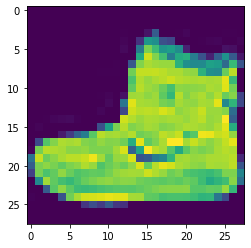

In [27]:
# Looking at the shoe, this is just one of the images
plt.imshow(x_train[0])

In [28]:
# Looking at one the arrays
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
# Function used to normalize the data
def normalize_img(num_array):
    arry = num_array/255

In [31]:
x_train_norm = normalize_img(x_train)
x_test_norm = normalize_img(x_test)


In [34]:
model = Sequential()

In [ ]:
model.compile()

In [ ]:
# Creating a function that will create the model
def create_model(input_shape = (28,28), flatten=False ):
    model = Sequential()
    
    # if the flatten flage is set to true will flatten the array
    if flatten == True:
        model.add(Flatten(input_shape=input_shape)))
        input_shape = None
    if input_shape != None:
        model.add(Dense(128, input_shape=input_shape))
    else:
        model.add(Dense(128))
    model.compile()
    model.add(Dense())

In [32]:
# Creating the model
model = Sequential()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.